<a href="https://colab.research.google.com/github/A24bhi/Analyzing-Naming-Trends-Using-Python./blob/main/Analyzing_Naming_Trends_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import zipfile
from io import BytesIO

# Load the zipped dataset
with zipfile.ZipFile("/content/names.zip", "r") as z:
    # Extract file names inside the ZIP
    file_list = z.namelist()

    # Read only required files (yobYYYY.txt)
    dfs = []
    for file in file_list:  # Use file_list instead of os.listdir(path)
        if file.startswith("yob") and file.endswith(".txt"):
            year = int(file[3:7])  # Extract year from filename (yobYYYY.txt)
            with z.open(file) as f:  # Read directly from ZIP
                df = pd.read_csv(f, header=None, names=["Name", "Sex", "Count"])
                df["Year"] = year
                dfs.append(df)

# Combine all years into a single DataFrame
baby_names = pd.concat(dfs, ignore_index=True)

# Display first few rows
print(baby_names.head())


        Name Sex  Count  Year
0       Mary   F   7065  1880
1       Anna   F   2604  1880
2       Emma   F   2003  1880
3  Elizabeth   F   1939  1880
4     Minnie   F   1746  1880


In [15]:
# Check dataset info
baby_names.info()

# Check for missing values
print(baby_names.isnull().sum())

# Check unique values in 'Sex' column
print(baby_names['Sex'].unique())

# Check number of records
print(f"Total records: {len(baby_names)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117219 entries, 0 to 2117218
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Sex     object
 2   Count   int64 
 3   Year    int64 
dtypes: int64(2), object(2)
memory usage: 64.6+ MB
Name     0
Sex      0
Count    0
Year     0
dtype: int64
['F' 'M']
Total records: 2117219


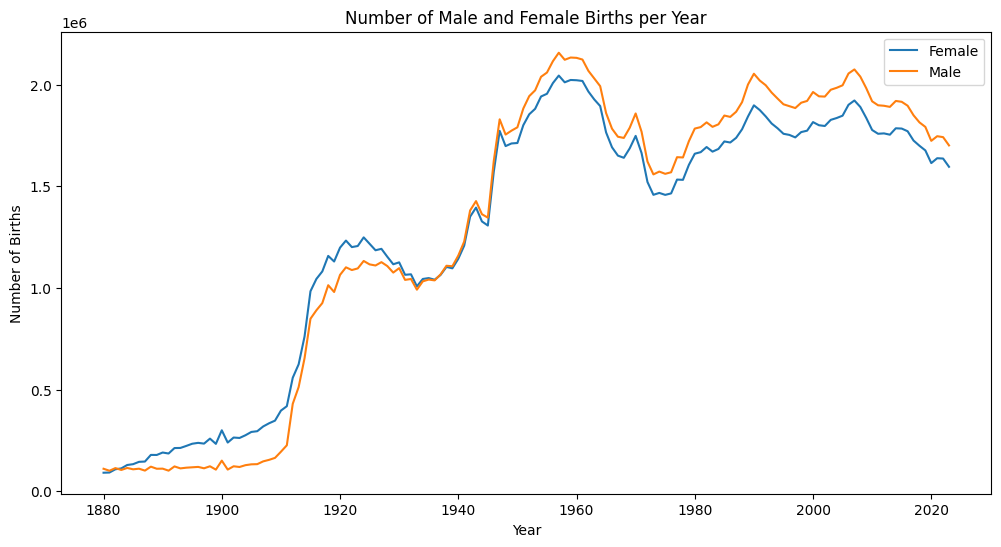

In [16]:
import matplotlib.pyplot as plt

# Group by Year and Sex, then sum the count
yearly_counts = baby_names.groupby(['Year', 'Sex'])['Count'].sum().unstack()

# Plot
yearly_counts.plot(kind='line', figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("Number of Births")
plt.title("Number of Male and Female Births per Year")
plt.legend(["Female", "Male"])
plt.show()


In [17]:
top_10_names = baby_names.groupby("Name")["Count"].sum().sort_values(ascending=False).head(10)
print(top_10_names)


Name
James      5250328
John       5187975
Robert     4862085
Michael    4431942
William    4194193
Mary       4152044
David      3675136
Joseph     2665333
Richard    2583933
Charles    2435467
Name: Count, dtype: int64


In [18]:
popular_names_per_year = baby_names.loc[baby_names.groupby("Year")["Count"].idxmax()]
print(popular_names_per_year[['Year', 'Name', 'Count']])


         Year  Name  Count
942      1880  John   9655
2938     1881  John   8768
4962     1882  John   9557
7115     1883  John   8894
9317     1884  John   9388
...       ...   ...    ...
1976098  2019  Liam  20611
2007720  2020  Liam  19842
2039415  2021  Liam  20391
2071226  2022  Liam  20533
2103070  2023  Liam  20802

[144 rows x 3 columns]


In [19]:
total_counts = baby_names.groupby("Name")["Count"].sum().reset_index()

In [20]:
most_popular_name = total_counts.loc[total_counts["Count"].idxmax()]
print(most_popular_name)


Name       James
Count    5250328
Name: 41172, dtype: object


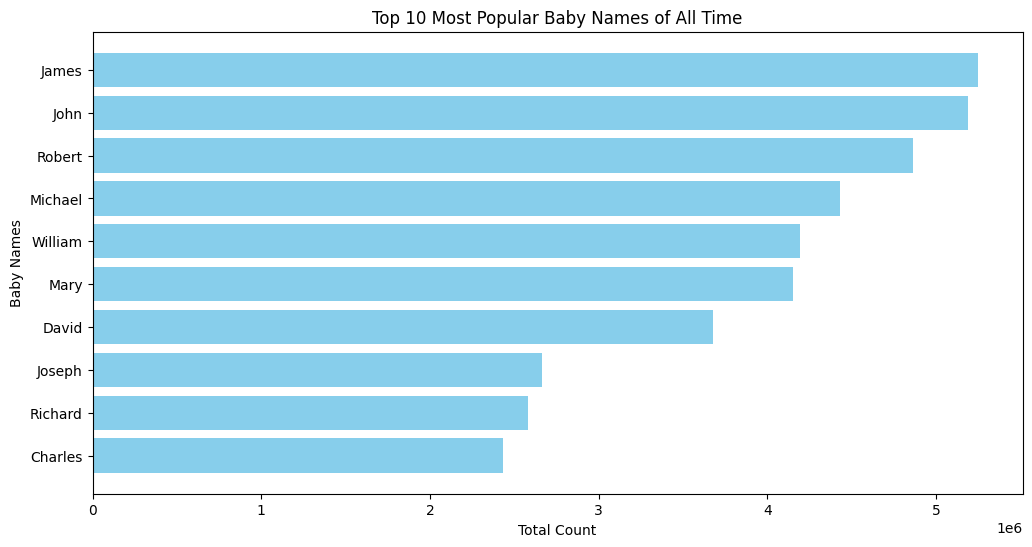

In [21]:
import matplotlib.pyplot as plt

# Step 1: Group by name and sum the count across all years
total_counts = baby_names.groupby("Name")["Count"].sum().reset_index()

# Step 2: Get the top 10 most popular names
top_10_names = total_counts.nlargest(10, "Count")

# Step 3: Plot the data
plt.figure(figsize=(12, 6))
plt.barh(top_10_names["Name"], top_10_names["Count"], color="skyblue")
plt.xlabel("Total Count")
plt.ylabel("Baby Names")
plt.title("Top 10 Most Popular Baby Names of All Time")
plt.gca().invert_yaxis()  # Invert y-axis to show the most popular at the top
plt.show()


In [23]:
!pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9bkd1gz/wh7hkfx7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9bkd1gz/iwd6mgsv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29124', 'data', 'file=/tmp/tmpx9bkd1gz/wh7hkfx7.json', 'init=/tmp/tmpx9bkd1gz/iwd6mgsv.json', 'output', 'file=/tmp/tmpx9bkd1gz/prophet_modellasoxtz9/prophet_model-20250209052015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:20:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

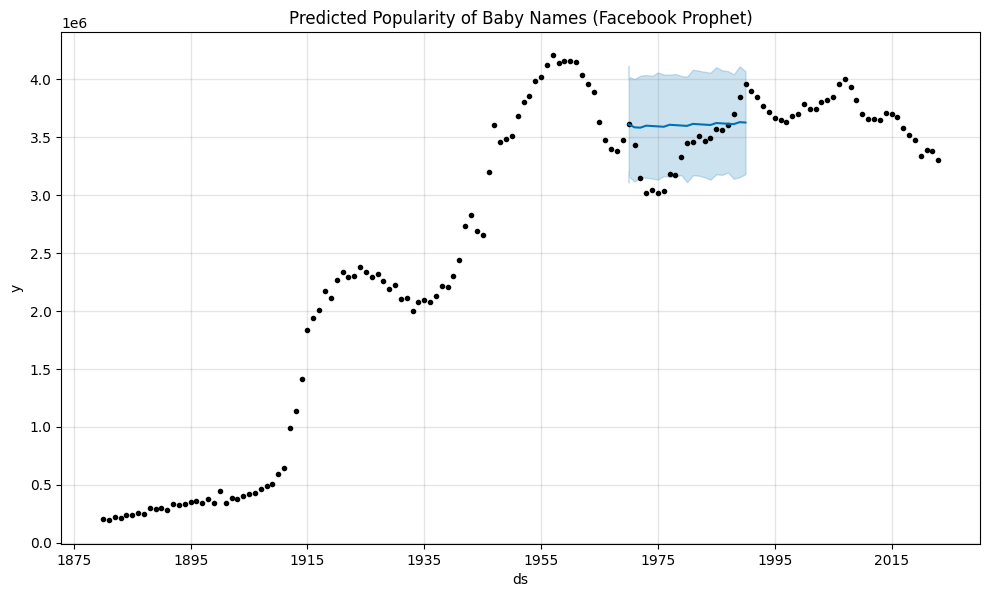

In [26]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for Prophet
prophet_data = baby_names.groupby("Year")["Count"].sum().reset_index()
prophet_data.columns = ["ds", "y"]  # Prophet requires 'ds' (date) and 'y' (value)

# Initialize and fit Prophet model
model = Prophet()
model.fit(prophet_data)

# Predict future trends for the next 20 years
future = model.make_future_dataframe(periods=20, freq="Y")
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title("Predicted Popularity of Baby Names (Facebook Prophet)")
plt.show()


**Historical Trend:**



*   The number of baby names shows a general upward trend from the late 1800s until around 1950, after which it fluctuates.

*   There was a sharp rise in name popularity from around 1910 to 1940, followed by a decline and stabilization.


***Forecasting & Confidence Interval: ***
*   The blue line represents the predicted trend for future years.
*   The blue shaded region indicates the uncertainty (confidence interval) around the prediction.


*   The model suggests that the popularity of baby names is expected to remain relatively stable with slight fluctuations.

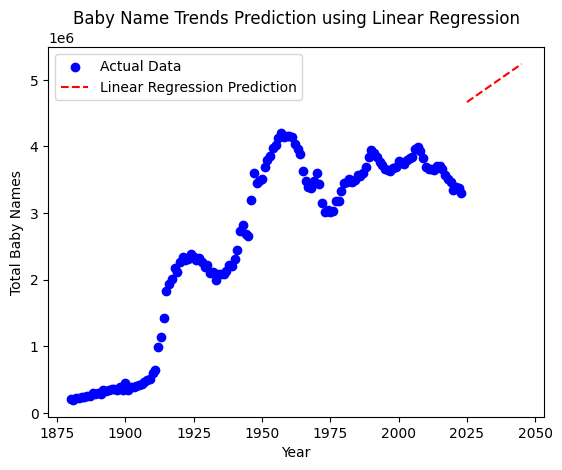

In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for regression
X = prophet_data["ds"].values.reshape(-1, 1)  # Year
y = prophet_data["y"].values  # Count

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Predict for future years (e.g., 2025-2045)
future_years = np.array(range(2025, 2046)).reshape(-1, 1)
predictions = lr_model.predict(future_years)

# Plot results
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(future_years, predictions, color="red", linestyle="dashed", label="Linear Regression Prediction")
plt.xlabel("Year")
plt.ylabel("Total Baby Names")
plt.legend()
plt.title("Baby Name Trends Prediction using Linear Regression")
plt.show()


**Actual Data (Blue Dots):**


*  Shows historical trends in the total number of baby names over the years.
*   There is a general increase until around 1950, followed by fluctuations and a slight decline in recent years.

**Linear Regression Prediction (Red Dashed Line):**



*   The model assumes a linear trend and projects future baby name counts based on past data.
*   It predicts a sharp increase beyond 2025, but this might not be accurate due to the non-linear nature of the actual data.

**Which Model is Better?**

**Prophet** Model is likely more suitable because naming trends are influenced by cultural, social, and external factors, which are not purely linear.

**Linear Regression** may be too simplistic for this type of time series data.